<a href="https://colab.research.google.com/github/Rohitiitk/Task-4-under-the-hood-/blob/main/Logistic_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv("/content/framingham.csv")
data=data.dropna()


In [56]:
for columns in (data.columns):
  data[columns] /=data.max()[columns] 

In [57]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,0.707963,0.494940,0.489059,0.128888,0.030361,0.005744,0.311543,0.027079,0.394788,0.448705,0.581839,0.453947,0.529584,0.207757,0.152352
std,0.496883,0.122302,0.255664,0.499949,0.170270,0.171602,0.075581,0.463187,0.162335,0.073494,0.074890,0.084034,0.071583,0.083797,0.060686,0.359411
min,0.000000,0.457143,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.188333,0.283051,0.336842,0.273592,0.307692,0.101523,0.000000
25%,0.000000,0.600000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.343333,0.396610,0.526316,0.406338,0.475524,0.180203,0.000000
50%,0.000000,0.700000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390000,0.433898,0.575439,0.446831,0.524476,0.197970,0.000000
75%,1.000000,0.800000,0.750000,1.000000,0.285714,0.000000,0.000000,1.000000,0.000000,0.438750,0.488136,0.631579,0.493662,0.573427,0.220812,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
msk = np.random.rand(len(data)) <=0.7

train_set_x = (data[msk].iloc[:,1:15].values)
train_set_y = (data[msk].iloc[:,-1].values)
test_set_x = (data[~msk].iloc[:,1:15].values)
test_set_y = (data[~msk].iloc[:,-1].values)

In [59]:
train_set_x = train_set_x.T
train_set_y = train_set_y.reshape(1, train_set_x.shape[1])

test_set_x = test_set_x.T
test_set_y = test_set_y.reshape(1, test_set_x.shape[1])

In [60]:
def sigmoid(x):
   s=1/(1+np.exp(-x))
   return s   


In [61]:
train_set_x.shape

(14, 2551)

In [62]:
train_set_x.shape[0]

14

In [63]:
def model(X, Y, learning_rate, iterations):
    
    m = X.shape[1]
    n = X.shape[0]
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
      
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list
        

In [64]:
iterations = 50000
learning_rate = 0.02
W, B, cost_list = model(train_set_x, train_set_y, learning_rate = learning_rate, iterations=iterations)

cost after  0 iteration is :  0.6931471805599453
cost after  5000 iteration is :  0.40577983478089497
cost after  10000 iteration is :  0.40081869278700505
cost after  15000 iteration is :  0.3974694150755795
cost after  20000 iteration is :  0.39487630600743967
cost after  25000 iteration is :  0.39276832981106646
cost after  30000 iteration is :  0.3910149854569254
cost after  35000 iteration is :  0.3895366745725537
cost after  40000 iteration is :  0.3882773193518994
cost after  45000 iteration is :  0.3871947433009075


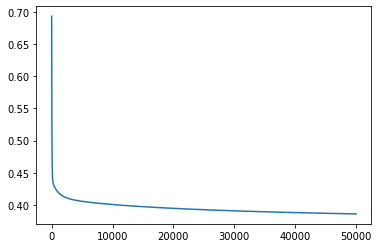

In [65]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [66]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [67]:
accuracy(test_set_x, test_set_y, W, B)

Accuracy of the model is :  84.52 %
